### Numpy basics

In [1]:
from functools import reduce
import numpy as np
import numpy.random as npr
import math
import matplotlib.pyplot as plt
import time

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [3]:
m = np.arange(12).reshape((3,4))
print("rows mean: ", m.mean(1))
print("columns mean: ", m.mean(0))
print("overall mean: ", m.mean())

rows mean:  [1.5 5.5 9.5]
columns mean:  [4. 5. 6. 7.]
overall mean:  5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [4]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
print(np.outer(u,v))    # outer function

p = np.array([x*y for x in u for y in v])   # list comprehension
print(p.reshape((len(u),len(v))))

print(u*v[:,np.newaxis])    # broadcasting  -->v[:,np.newaxis] transpose adding a dimension axis(0)=1

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  6 10 14]
 [ 4 12 20 28]
 [ 6 18 30 42]
 [ 8 24 40 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [11]:
M = npr.rand(10,6)
print(M)
print("\nSetting the rows with any entry less than 0.1 to be zero:")
# for row in range(size(M0,0)):
for i in range(10):
    if np.any(M[i,:]<0.1):
        M[i,:] = np.zeros(6)
print(M)

[[0.28413056 0.42211127 0.49606099 0.58717625 0.25305406 0.92630243]
 [0.00282449 0.84495146 0.58158097 0.60271246 0.48092182 0.93286306]
 [0.64907482 0.26835664 0.34299117 0.60142498 0.5105567  0.25994412]
 [0.06401393 0.74418462 0.20539331 0.8307213  0.82626632 0.69954717]
 [0.80948474 0.85608801 0.94235258 0.03786117 0.81170525 0.06445978]
 [0.32105088 0.2508364  0.48948813 0.97175144 0.6268452  0.54316118]
 [0.16187528 0.62144673 0.58319799 0.76068514 0.23708724 0.85177141]
 [0.63182825 0.82512719 0.21001421 0.52216606 0.63963479 0.71591552]
 [0.57826677 0.11431084 0.54230771 0.90780146 0.39966017 0.54379063]
 [0.49107348 0.57048497 0.38100188 0.77618938 0.31607372 0.49762707]]

Setting the rows with any entry less than 0.1 to be zero:
[[0.28413056 0.42211127 0.49606099 0.58717625 0.25305406 0.92630243]
 [0.         0.         0.         0.         0.         0.        ]
 [0.64907482 0.26835664 0.34299117 0.60142498 0.5105567  0.25994412]
 [0.         0.         0.         0.      

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

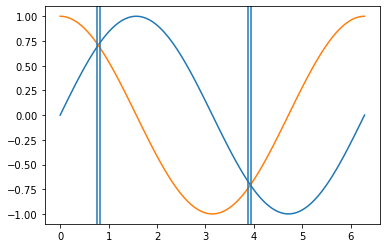

In [13]:
x = np.linspace(0,2*math.pi,100)
print(x)

print(x[9::10])
print(x[100:0:-10])
p = np.array([i for i in x if abs(math.cos(i)-math.sin(i))<0.1])
print(p)
sin = np.sin(x)
cos = np.cos(x)
plt.plot(x,sin,x,cos)
for point in p:         # i used the condition of third point to find where sin and cos are close
    plt.axvline(point)
plt.show()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [14]:
T = np.arange(1,11)*np.arange(1,11)[:,np.newaxis]
print(T)
trace = np.sum(np.diag(T))
print(trace)
AntiDiagonal = np.diag(np.fliplr(T))
print(AntiDiagonal)
T1 = T[1:,:9]
d = np.diag(T1)
print(d)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
385
[10 18 24 28 30 30 28 24 18 10]
[ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [15]:
miles = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
ratio_Km_miles = 1.6
miles = miles*ratio_Km_miles
distances = np.abs(miles - miles[:, np.newaxis])
print(distances)


[[   0.   316.8  484.8 1177.6 1393.6 1880.  2360.  2470.4 3060.8 3916.8]
 [ 316.8    0.   168.   860.8 1076.8 1563.2 2043.2 2153.6 2744.  3600. ]
 [ 484.8  168.     0.   692.8  908.8 1395.2 1875.2 1985.6 2576.  3432. ]
 [1177.6  860.8  692.8    0.   216.   702.4 1182.4 1292.8 1883.2 2739.2]
 [1393.6 1076.8  908.8  216.     0.   486.4  966.4 1076.8 1667.2 2523.2]
 [1880.  1563.2 1395.2  702.4  486.4    0.   480.   590.4 1180.8 2036.8]
 [2360.  2043.2 1875.2 1182.4  966.4  480.     0.   110.4  700.8 1556.8]
 [2470.4 2153.6 1985.6 1292.8 1076.8  590.4  110.4    0.   590.4 1446.4]
 [3060.8 2744.  2576.  1883.2 1667.2 1180.8  700.8  590.4    0.   856. ]
 [3916.8 3600.  3432.  2739.2 2523.2 2036.8 1556.8 1446.4  856.     0. ]]


7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [18]:
N = 99
n = np.arange(1, N)
for f in range(2,N):
    n[np.logical_and((n % f)==0, n > f)] = 0
print(np.extract(n!=0, n))
print("-------------------\n")

for i in range(N,1000): # analyzing the execution time increasing N
    n = np.arange(1, i)
    start_time = time.time()
    for f in range(2,i):
        n[np.logical_and((n % f)==0, n > f)] = 0
    t = time.time()-start_time
    print("execution time for N=", i, "is:", t)


[ 1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83
 89 97]
-------------------

execution time for N= 99 is: 0.0
execution time for N= 100 is: 0.004338741302490234
execution time for N= 101 is: 0.0010118484497070312
execution time for N= 102 is: 0.0020580291748046875
execution time for N= 103 is: 0.0
execution time for N= 104 is: 0.000263214111328125
execution time for N= 105 is: 0.0010323524475097656
execution time for N= 106 is: 0.0010447502136230469
execution time for N= 107 is: 0.0010528564453125
execution time for N= 108 is: 2.2172927856445312e-05
execution time for N= 109 is: 0.0010139942169189453
execution time for N= 110 is: 0.0
execution time for N= 111 is: 0.0
execution time for N= 112 is: 0.0
execution time for N= 113 is: 0.0
execution time for N= 114 is: 0.0
execution time for N= 115 is: 0.0
execution time for N= 116 is: 0.0
execution time for N= 117 is: 0.0
execution time for N= 118 is: 0.0
execution time for N= 119 is: 0.0
execution time for N= 120 i

execution time for N= 320 is: 0.015625715255737305
execution time for N= 321 is: 0.0
execution time for N= 322 is: 0.0
execution time for N= 323 is: 0.0
execution time for N= 324 is: 0.015630245208740234
execution time for N= 325 is: 0.0
execution time for N= 326 is: 0.0048329830169677734
execution time for N= 327 is: 0.0
execution time for N= 328 is: 0.0
execution time for N= 329 is: 0.008382558822631836
execution time for N= 330 is: 0.0
execution time for N= 331 is: 0.0
execution time for N= 332 is: 0.0
execution time for N= 333 is: 0.0
execution time for N= 334 is: 0.0077745914459228516
execution time for N= 335 is: 0.0
execution time for N= 336 is: 0.008003473281860352
execution time for N= 337 is: 0.0
execution time for N= 338 is: 0.007998228073120117
execution time for N= 339 is: 0.0
execution time for N= 340 is: 0.0
execution time for N= 341 is: 0.008001565933227539
execution time for N= 342 is: 0.0
execution time for N= 343 is: 0.00800013542175293
execution time for N= 344 is: 

execution time for N= 524 is: 0.008619546890258789
execution time for N= 525 is: 0.007997274398803711
execution time for N= 526 is: 0.00801849365234375
execution time for N= 527 is: 0.0
execution time for N= 528 is: 0.008000850677490234
execution time for N= 529 is: 0.007999658584594727
execution time for N= 530 is: 0.008000850677490234
execution time for N= 531 is: 0.008000612258911133
execution time for N= 532 is: 0.0
execution time for N= 533 is: 0.008255958557128906
execution time for N= 534 is: 0.0
execution time for N= 535 is: 0.01572394371032715
execution time for N= 536 is: 0.0
execution time for N= 537 is: 0.015543937683105469
execution time for N= 538 is: 0.0
execution time for N= 539 is: 0.0
execution time for N= 540 is: 0.015701770782470703
execution time for N= 541 is: 0.0
execution time for N= 542 is: 0.015549898147583008
execution time for N= 543 is: 0.0
execution time for N= 544 is: 0.015825510025024414
execution time for N= 545 is: 0.0
execution time for N= 546 is: 0.0

execution time for N= 707 is: 0.008001089096069336
execution time for N= 708 is: 0.008001565933227539
execution time for N= 709 is: 0.016000986099243164
execution time for N= 710 is: 0.008000850677490234
execution time for N= 711 is: 0.00800180435180664
execution time for N= 712 is: 0.00800013542175293
execution time for N= 713 is: 0.01599860191345215
execution time for N= 714 is: 0.008004426956176758
execution time for N= 715 is: 0.008001089096069336
execution time for N= 716 is: 0.008011579513549805
execution time for N= 717 is: 0.01600170135498047
execution time for N= 718 is: 0.00800633430480957
execution time for N= 719 is: 0.00798344612121582
execution time for N= 720 is: 0.016013622283935547
execution time for N= 721 is: 0.008006811141967773
execution time for N= 722 is: 0.007984399795532227
execution time for N= 723 is: 0.008018255233764648
execution time for N= 724 is: 0.016002178192138672
execution time for N= 725 is: 0.007983922958374023
execution time for N= 726 is: 0.00799

execution time for N= 891 is: 0.022172212600708008
execution time for N= 892 is: 0.015799283981323242
execution time for N= 893 is: 0.008002996444702148
execution time for N= 894 is: 0.015991926193237305
execution time for N= 895 is: 0.008074760437011719
execution time for N= 896 is: 0.015643835067749023
execution time for N= 897 is: 0.01560831069946289
execution time for N= 898 is: 0.01564335823059082
execution time for N= 899 is: 0.015610218048095703
execution time for N= 900 is: 0.015622138977050781
execution time for N= 901 is: 0.015628814697265625
execution time for N= 902 is: 0.01562356948852539
execution time for N= 903 is: 0.0
execution time for N= 904 is: 0.01563858985900879
execution time for N= 905 is: 0.015631437301635742
execution time for N= 906 is: 0.024685144424438477
execution time for N= 907 is: 0.016017436981201172
execution time for N= 908 is: 0.01599860191345215
execution time for N= 909 is: 0.008045196533203125
execution time for N= 910 is: 0.015625
execution time

**N.B. the following exercises are meant to be solved only if you are familiar with the numpy random library. If not you can skip them (postponed for one of the next exercise sessions)**


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.